# Taller 1: operaciones elementales sobre imágenes

## Visualice la imagen.

In [3]:
# Modificar las rutas de las imagenes.
PATH_IMAGES = "./imagenes/"

In [16]:
import cv2

image = cv2.imread(PATH_IMAGES + "BUREAU.png", cv2.IMREAD_GRAYSCALE)

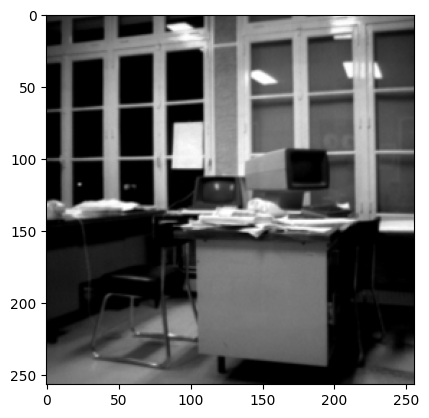

In [17]:
import matplotlib.pyplot as plt

plt.imshow(imagen_BUREAU, cmap='gray')
plt.show()

## Visualice los planos binarios de la imagen. Identifique el plano más significativo y el menos significativo. ¿Cuál es su conclusión?

In [20]:
import numpy as np
import cv2

def bit_plane_slicing(imagen, k):
    plane = np.full((imagen.shape[0], imagen.shape[1]), 2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)

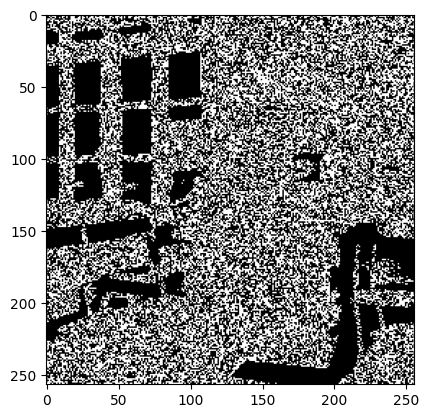

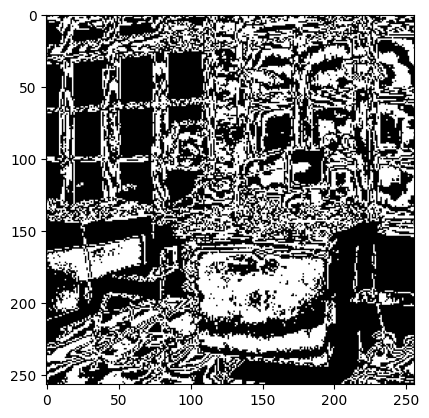

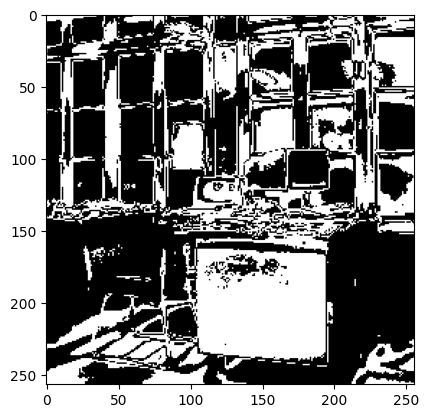

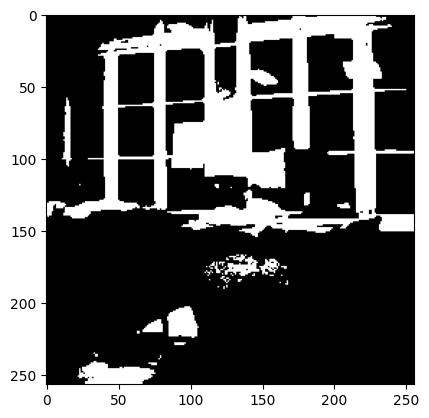

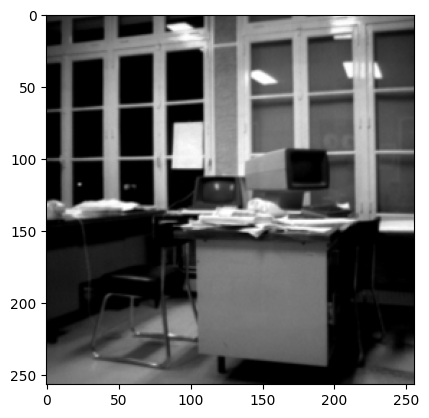

In [23]:
plane = bit_plane_slicing(image,0)
plane1 = bit_plane_slicing(image,1)
plane2 = bit_plane_slicing(image,2)
plane3 = bit_plane_slicing(image,3)
plane4 = bit_plane_slicing(image,4)
plane5 = bit_plane_slicing(image,5)
plane6 = bit_plane_slicing(image,6)
plane7 = bit_plane_slicing(image,7)

image_reconstructed = (plane+plane1+plane2+plane3+plane4+plane5+plane6+plane7)

plt.imshow(plane, cmap="gray")
plt.show()

plt.imshow(plane3, cmap="gray")
plt.show()

plt.imshow(plane5, cmap="gray")
plt.show()

plt.imshow(plane7, cmap="gray")
plt.show()

plt.imshow(image_reconstructed, cmap="gray")
plt.show()

Observamos varios planos de la imagen, desde el menos significativo (bit k=0), hasta el más significativo (bit k=7). En los menos significativos, los planos parecen ruido aleatorio y solo capturan variaciones mínimas de intensidad. A medida que van aumentado los bits del plano, podemos ver formas que comprenden la composición de la imagen. En el plano k=5 podemos ver por ejemplo el computador y en el plano k=7 podemos ver el escritorio y las ventanas.

## Modifique la cuantificación de la imagen. Para esto, aplique la operación lógica de cuantificación, sobre 5, 3 y 1 bits respectivamente (en la práctica, ésto consiste en poner en cero, respectivamente, 3, 5 y 7 bits menos significativos). Visualice las imágenes resultado y comente sus conclusiones.

In [24]:
def image_quantization(imagen, k):
    plane = np.full((imagen.shape[0], imagen.shape[1]), 255-2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)
    

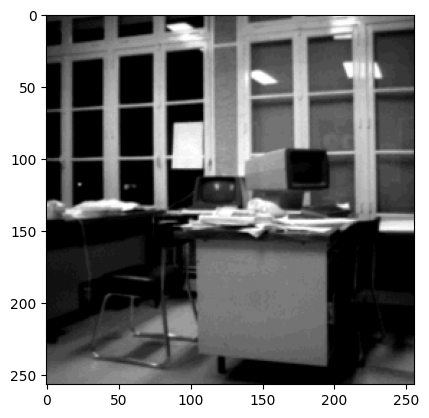

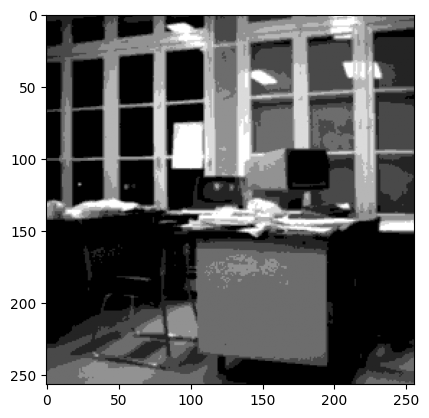

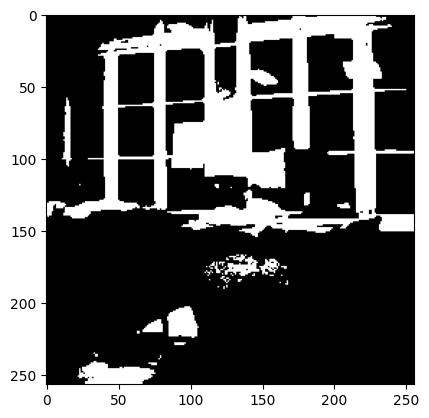

In [25]:
# Cuantificacion de una imagen
def image_quantization(imagen, k):
    plane = np.full((imagen.shape[0], imagen.shape[1]), 255-2 ** k, np.uint8)
    return cv2.bitwise_and(plane, imagen)


img_5bits = image.copy() #Apagar los 3 planos de bits menos significativos
for k in [0, 1, 2]:
    img_5bits = image_quantization(img_5bits, k)
    
plt.imshow(img_5bits, cmap="gray")
plt.show()
    
img_3bits = image.copy() #Apagar los 5 planos de bits menos significativos
for k in [0, 1, 2, 3, 4]:
    img_3bits = image_quantization(img_3bits, k)

plt.imshow(img_3bits, cmap="gray")
plt.show()

img_1bits = image.copy() #Apagar los 5 planos de bits menos significativos
for k in [0, 1, 2, 3, 4, 5, 6]:
    img_1bits = image_quantization(img_1bits, k)

plt.imshow(img_1bits, cmap="gray")
plt.show()

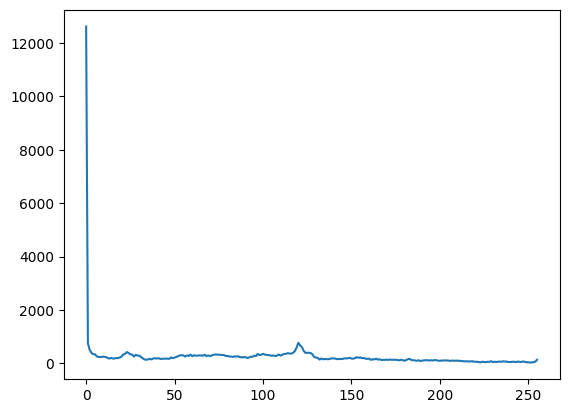

In [29]:
hist = cv2.calcHist([imagen],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

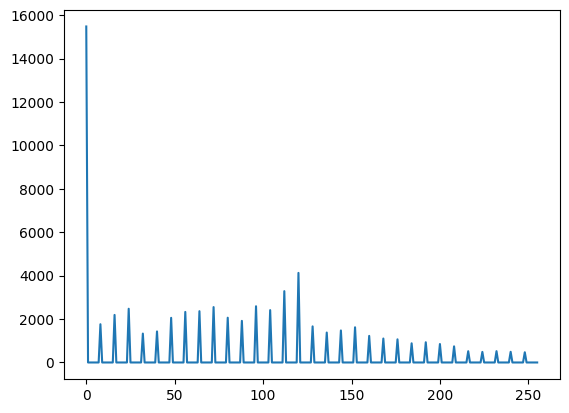

In [27]:
hist = cv2.calcHist([img_5bits],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()


A medida que reduces los bits, la imagen pierde grados de tonos, creando bordes artificiales que antes no estban en la imagen. En el caso de 5 bits, la imagen todavía mantiene su calidad y los objetos todavía se pueden distinguir. En la imagen de 3 bits ya se empiezan a perder objetos, como la silla y los colores pasan a ser manchas sin ningún tipo de cambio en el tono. La imagen de 1 bit es el plano binario que se distinguió previamente. 